# MC866 Project 1

## PART I - Clustering Methods

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## Clustering using Expectation–Maximization (EM) Gaussian Mixture Model (GMM)

In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm
from scipy.stats import multivariate_normal

In [13]:
class GMM:
    def __init__(self, data, n_clusters=3, random_state=None):
        self.n_clusters = n_clusters
        self.data = data
        self.rand = np.random.RandomState(random_state)
        self.means = []
        self.covs = []

    def init_clusters(self):
        cluster = np.array_split(self.rand.permutation(self.data), self.n_clusters)
        for c in cluster:
            self.means = np.append(self.means, np.mean(c, axis=0))
            self.covs = np.append(self.covs, np.cov(c.T))
        self.means = self.means.reshape(self.n_clusters, 2)
        self.covs = self.covs.reshape(self.n_clusters, 2, 2)

    def __probabilities_by_cluster(self):
        probabilities = np.array([])
        for i in range(0, self.n_clusters):
            var = multivariate_normal(mean=self.means[i], cov=self.covs[i], allow_singular=True)
            probabilities = np.append(probabilities, np.array([var.pdf(d) for d in self.data]))
        
        probabilities = probabilities.reshape((self.n_clusters, len(self.data)))
        return probabilities.T

    def clusters(self):
        probabilities = self.__probabilities_by_cluster()
        return np.argmax(probabilities, axis=1) 

    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, self.n_clusters):
                data_filter = clusters == i
                filtered_data = self.data[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = avg/filtered_data.shape[0]
                cov = np.cov(filtered_data.T)
                
                for j in range (0, avg.shape[0]):
                    if self.means[i][j] != avg[j]:
                        changed = True
                        self.means[i][j] = avg[j]
                        self.covs[i] = cov
                        
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))

### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [14]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

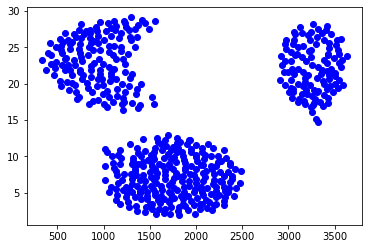

In [15]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [16]:
gmm = GMM(data=df_train.to_numpy(), n_clusters=3)

The clusters are initialy initialized with random points of the dataset provided for training.

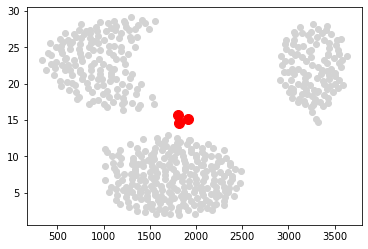

In [17]:
# initialize clusters and show their initial position in the chart
gmm.init_clusters()
    
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

We use the clusters() method to get which cluster each data point has the highest probability of belonging

In [18]:
gmm.clusters()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Initially without any fitting, the clusters provided are the following

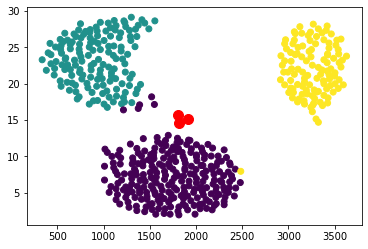

In [19]:
# initialize clusters and show their initial position in the chart

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

In [20]:
gmm.fit()

converged in 3 iterations
--- 0.18395495414733887 seconds ---


### Results after fitting with the raw training data

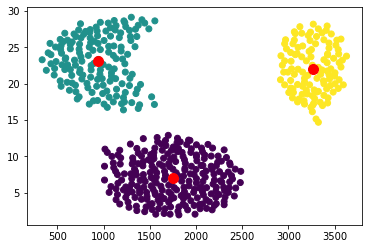

In [21]:
# Result of clusters after fitting is done

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

As we can see, despite the fact that X and Y are on different scales, the GMM algorithm converged to optimal clusters even without a prior data normalization (unlike k-means)

## Checking the test data distribution

In [ ]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

In [22]:
n_clusters = 3
data = df_train.to_numpy()
points = np.random.RandomState(None).permutation(data)[:n_clusters]
means = []
covs = []
for p in points:
    means = np.append(means, p)
    covs = np.append(covs, np.cov(p))
means = means.reshape(n_clusters, 2)

probabilities = np.array([])
for i in range(0, n_clusters):
    var = multivariate_normal(mean=means[i], cov=covs[i], allow_singular=True)
    probabilities = np.append(probabilities, np.array([var.pdf(d) for d in data]))

probabilities = probabilities.reshape((n_clusters, len(data)))
probabilities = probabilities.T
print(data[0])
print(probabilities)

np.argmax(probabilities, axis=1)

[1555.     28.65]
[[1.84877054e-07 2.00952367e-07 1.73807232e-07]
 [1.88059763e-07 2.06525431e-07 1.76139302e-07]
 [1.89724106e-07 2.09752999e-07 1.77272185e-07]
 ...
 [9.82341810e-09 5.66959076e-09 1.22770641e-08]
 [8.69747931e-09 4.91177928e-09 1.09831448e-08]
 [1.22809685e-08 7.37862173e-09 1.50579923e-08]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,